In [43]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# from sklearn import preprocessing
# import statistics
# import math
# import os
# import warnings
# warnings.filterwarnings('ignore')
# from datetime import datetime as dt
# pd.set_option('display.max_columns', None)
import os

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
#from sklearn import cross_validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [45]:
#import clean and cat data
directory = os.getcwd()

OG = pd.read_csv(directory + '/EMS_2017_2018_cat_final.csv', sep=',')
#cat_values = pd.read_csv(directory + '/cat_values.csv', sep=',')

In [46]:
OG.columns

Index(['CAD_INCIDENT_ID', 'INCIDENT_DATETIME', 'INITIAL_CALL_TYPE',
       'INITIAL_SEVERITY_LEVEL_CODE', 'FIRST_ASSIGNMENT_DATETIME',
       'DISPATCH_RESPONSE_SECONDS_QY', 'FIRST_ACTIVATION_DATETIME',
       'FIRST_ON_SCENE_DATETIME', 'INCIDENT_RESPONSE_SECONDS_QY',
       'INCIDENT_TRAVEL_TM_SECONDS_QY', 'HELD_INDICATOR', 'BOROUGH',
       'INCIDENT_DISPATCH_AREA', 'ZIPCODE', 'POLICEPRECINCT',
       'CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT', 'COMMUNITYSCHOOLDISTRICT',
       'CONGRESSIONALDISTRICT', 'TRANSFER_INDICATOR', 'INCIDENT_Hour',
       'INCIDENT_Month', 'FIRST_ASSIGNMENT_Hour', 'FIRST_ASSIGNMENT_Month',
       'FIRST_ACTIVATION_Hour', 'FIRST_ACTIVATION_Month',
       'FIRST_ON_SCENE_Hour', 'FIRST_ON_SCENE_Month'],
      dtype='object')

In [47]:
# data = data_wrk.drop(['INCIDENT_DATETIME','FIRST_ASSIGNMENT_DATETIME','FIRST_ACTIVATION_DATETIME',
#        'FIRST_ON_SCENE_DATETIME','INCIDENT_Hour',
#        'INCIDENT_Month', 'FIRST_ASSIGNMENT_Hour', 'FIRST_ASSIGNMENT_Month',
       
#        'FIRST_ON_SCENE_Hour', 'FIRST_ON_SCENE_Month'], axis = 1)

In [48]:
# 'INITIAL_CALL_TYPE','INITIAL_SEVERITY_LEVEL_CODE'
# data = data_wrk.drop(['CAD_INCIDENT_ID'], 1)
# data = data_wrk.drop(['DISPATCH_RESPONSE_SECONDS_QY'], 1)
# data = data_wrk.drop(['HELD_INDICATOR'], 1)
# data = data_wrk.drop(['BOROUGH'], 1)
# data = data_wrk.drop(['INCIDENT_RESPONSE_SECONDS_QY'], 1)

In [49]:
data = OG[['INITIAL_CALL_TYPE','INITIAL_SEVERITY_LEVEL_CODE',
                'DISPATCH_RESPONSE_SECONDS_QY','HELD_INDICATOR','BOROUGH','INCIDENT_RESPONSE_SECONDS_QY',
                'INCIDENT_TRAVEL_TM_SECONDS_QY','FIRST_ACTIVATION_Hour', 'FIRST_ACTIVATION_Month', 'ZIPCODE', 
           'POLICEPRECINCT',]]

In [50]:
data_wrk = data.sample(n = 50000) 

In [51]:
data_wrk = data.sample(n = 50000) 
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [52]:
X_test.columns

Index(['INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE',
       'DISPATCH_RESPONSE_SECONDS_QY', 'HELD_INDICATOR', 'BOROUGH',
       'INCIDENT_RESPONSE_SECONDS_QY', 'FIRST_ACTIVATION_Hour',
       'FIRST_ACTIVATION_Month', 'ZIPCODE', 'POLICEPRECINCT'],
      dtype='object')

In [53]:
clf_def = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 20)

In [54]:
clf_def = clf_def.fit(X_train, Y_train)

In [55]:
dt_pred = clf_def.predict_proba(X_test)

In [56]:
importances = clf_def.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

Text(0.5, 0, 'Relative Importance')

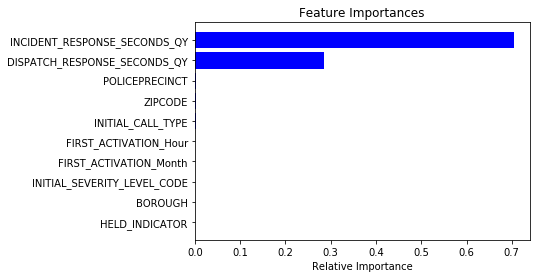

In [57]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color='b', align='center')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Relative Importance')

In [58]:
data = OG[['INITIAL_CALL_TYPE','INITIAL_SEVERITY_LEVEL_CODE',
                'HELD_INDICATOR','BOROUGH',
                'INCIDENT_TRAVEL_TM_SECONDS_QY','FIRST_ACTIVATION_Hour', 'FIRST_ACTIVATION_Month', 'ZIPCODE', 
           'POLICEPRECINCT','CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT','INCIDENT_DISPATCH_AREA']]

In [59]:
data_wrk = data.sample(n = 50000) 
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [60]:
clf_def = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 20)

In [61]:
clf_def = clf_def.fit(X_train, Y_train)

In [62]:
dt_pred = clf_def.predict_proba(X_test)

In [63]:
importances = clf_def.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

Text(0.5, 0, 'Relative Importance')

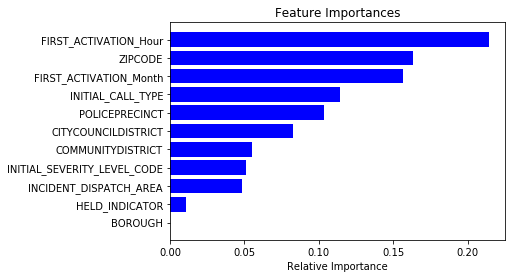

In [64]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color='b', align='center')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Relative Importance')

In [65]:
##FINAL DATASET
data = OG[['INCIDENT_RESPONSE_SECONDS_QY', 'DISPATCH_RESPONSE_SECONDS_QY','FIRST_ACTIVATION_Hour', 'FIRST_ACTIVATION_Month'
          ,'ZIPCODE','INITIAL_CALL_TYPE','CITYCOUNCILDISTRICT','POLICEPRECINCT','COMMUNITYDISTRICT',
          'INITIAL_SEVERITY_LEVEL_CODE', 'INCIDENT_DISPATCH_AREA', 'INCIDENT_TRAVEL_TM_SECONDS_QY']]

In [66]:
data_wrk = data.sample(n = 50000) 
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [67]:
rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)

In [68]:
rf_def = rf_def.fit(X_train, Y_train)

In [69]:
# # #We'll build a RF and compare to a DT
#clf_def = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 20)
#clf_def = clf_def.fit(X_train, Y_train)
#dt_pred = clf_def.predict_proba(X_test)

#rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
#rf_def = rf_def.fit(X_train, Y_train)
#rf_pred = rf_def.predict_proba(X_test)

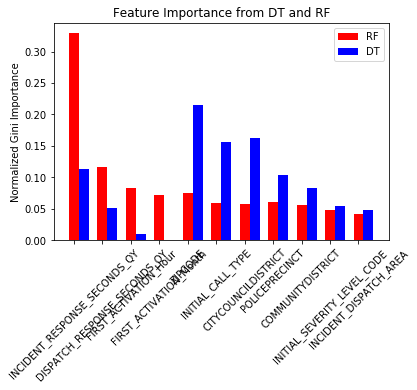

In [70]:
# %matplotlib inline

cols = X_train.columns.values
rf_fi = rf_def.feature_importances_
dt_fi = clf_def.feature_importances_

fig, ax = plt.subplots()
width=0.35

ax.bar(np.arange(len(cols)), rf_fi, width, color='r', label='RF')
ax.bar(np.arange(len(cols))+width, dt_fi, width, color='b', label='DT')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation=45)
plt.title('Feature Importance from DT and RF')
ax.set_ylabel('Normalized Gini Importance')
plt.legend(loc=1)

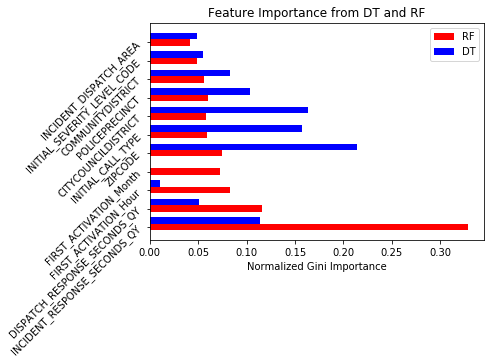

In [79]:
%matplotlib inline

cols = X_train.columns.values
rf_fi = rf_def.feature_importances_
dt_fi = clf_def.feature_importances_

fig, ax = plt.subplots()
width=0.35

ax.barh(np.arange(len(cols)), rf_fi, width, color='r', label='RF')
ax.barh(np.arange(len(cols))+width, dt_fi, width, color='b', label='DT')

ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols, rotation=45)
plt.title('Feature Importance from DT and RF')
ax.set_xlabel('Normalized Gini Importance')
plt.legend(loc=1)

In [80]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [81]:
model_score = regressor.score(X_train,Y_train)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score
print("coefficient of determination R^2 of the prediction.: ",model_score)
y_predicted = regressor.predict(X_test)

coefficient of determination R^2 of the prediction.:  1.0


In [83]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_test, y_predicted))

Mean squared error: 4901.30
Test Variance score: 0.96


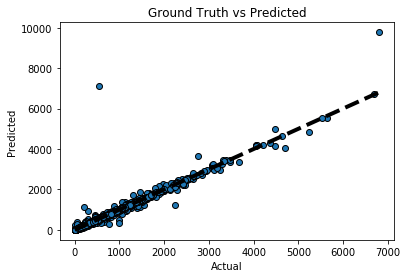

In [84]:
# model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [71]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0)) #.fillna(0)

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train.fillna(0)), Y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train), Y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [74]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [75]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 11
selected features: 11
features with coefficients shrank to zero: 8786


In [76]:
# #To see which features are important we can use get_support method on the fitted model.
# sel.get_support()
# #It will return an array of boolean values. 
# #True for the features whose importance is greater than the mean importance and False for the rest.

In [77]:
# selected_feat= X_train.columns[(sel.get_support())]
# print(selected_feat)
# # To get the name of the features selected

In [78]:
# cols = X_train.columns.values
# #rf_fi = rf_best.feature_importances_
# dt_fi = clf_def.feature_importances_

# fig, ax = plt.subplots()
# width=0.35

# #ax.bar(np.arange(len(cols)), rf_fi, width, color='r', label='RF')
# ax.bar(np.arange(len(cols))+width, dt_fi, width, color='b', label='DT')

# ax.set_xticks(np.arange(len(cols)))
# ax.set_xticklabels(cols, rotation=45)
# plt.title('Feature Importance from DT and RF')
# ax.set_ylabel('Normalized Gini Importance')
# plt.legend(loc=1)